In [225]:
import pandas as pd
import numpy as np
import os

#### check number of files

In [226]:
files = [file for file in os.listdir('./Sales_data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### merge multiple files in to one file and save as new file

In [227]:
#loading all file
files = [file for file in os.listdir('./Sales_data')]

#create empty dataframe
all_data = pd.DataFrame()

#load each file and cancat in to dataframe
for file in files:
    df1 = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data,df1])
all_data.to_csv('all_data.csv',index=True)


#### load new file

In [228]:
df = pd.read_csv('all_data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [229]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

(186850, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB
None
Unnamed: 0            0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
          Unnamed: 0
count  186850.000000
mean     8340.095419
std      5450.884089
min         0.000000
25%      3892.000000
50%      7785.000000
75%     11872.000000
max     25116.000000


#### drop_na


In [230]:
df.dropna(how='any',inplace=True)
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Tasks

#### 1.what was the best month for sales? and how much earned that month¶

#### Add month column

In [231]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### convert str to int

In [232]:
df = df[df['Month'] != 'Or']

In [233]:
df['Month'] = df['Month'].astype('int32')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
#we can use another type toconvert to numeric
#df['Quantity Ordered'] = pd.to_numeric(df[''Quantity Ordered''])
df['Price Each'] = df['Price Each'].astype('float32')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [234]:
df.shape

(185950, 8)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  object 
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int32  
 4   Price Each        185950 non-null  float32
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int32  
dtypes: float32(1), int32(2), int64(1), object(4)
memory usage: 10.6+ MB


In [236]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


###### As we can see above we have Quantity and prices per each order. so we will multiply quantity with price column so that we will get total prcie for each order .

In [237]:
df.Month.value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

In [238]:
df.groupby('Month').sum()

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,47433245,10903,1811768.375,1822256.75
2,72123197,13449,2188884.750,2202022.50
3,115333587,17005,2791207.750,2807100.25
4,167977608,20558,3367671.000,3390670.25
5,137829259,18667,3135125.000,3152606.75
6,92330356,15253,2562025.500,2577802.25
7,102752005,16072,2632539.500,2647775.75
8,71824951,13448,2230345.500,2244467.75
9,67863032,13109,2084992.125,2097560.00


In [239]:
results = df.groupby('Month').sum()

<BarContainer object of 12 artists>

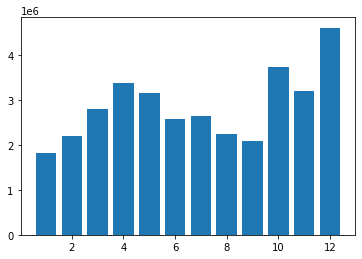

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
months = range(1,13)
plt.bar(months,results['Sales'])


###### As we can see the 12th month has more sales(4613443.50) in sales column. and follwed by 10th month has more sales.

#### 2. is there any seasonal trend in sales increase and decrease

<BarContainer object of 12 artists>

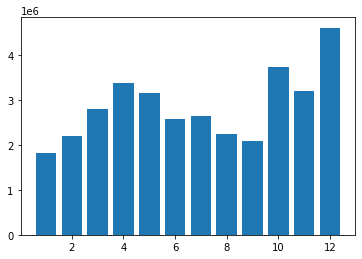

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
months = range(1,13)
plt.bar(months,results['Sales'])


###### Yes there is a trend.
in general....

As we can se above in 12th month we have high sales becuase(cristmas) frestivel.

2,3 Months are dull becuase everyone alrady done shoping for cristmas. so there is not much sales.
 
10th, 11th, months are pre cristmas days and also similarly 2,3 months factor also works here. so sales are average.

1st month there is big sales difference becuase after cristmas no one will interested to shoping.

4,5 months sales are incrased becuase(past 3 months) they havent done shoping. so some sales increased.
>


#### 3.Which city have heighest sales

In [242]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


###### Here we will split the purchase adress column then we will extract city name, state name into new column

In [243]:
#split purchase column with , and take city name
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
#split purchase column with , and take state code, zipcode.
df['state'] = df['Purchase Address'].apply(lambda x: x.split(',')[2])
#split the state column with space and take state code.
df['add'] = df['state'].apply(lambda x: x.split(' ')[1])
#add state, state code to get compleat address
df['Adress'] = df['City']+' '+df['add']
#drop unwanted columns
df.drop(['City','state','add'],axis=1,inplace=True)
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress
0,0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


In [244]:
df.Adress.value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: Adress, dtype: int64

In [245]:
results = df.groupby('Adress').sum()
results

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
Adress,,,,,
Atlanta GA,122928154,16602,2779908.250,104794,2.795498e+06
Austin TX,82709457,11153,1809873.625,69829,1.819582e+06
Boston MA,165758780,22528,3637409.750,141112,3.661642e+06
Dallas TX,124308328,16730,2752627.750,104620,2.767976e+06
Los Angeles CA,247743297,33289,5421435.000,208325,5.452571e+06
New York City NY,208439450,27932,4635371.000,175741,4.664318e+06
Portland ME,20641344,2750,447189.250,17144,4.497583e+05
Portland OR,83402354,11303,1860558.250,70621,1.870732e+06
San Francisco CA,372569180,50239,8211461.500,315520,8.262204e+06


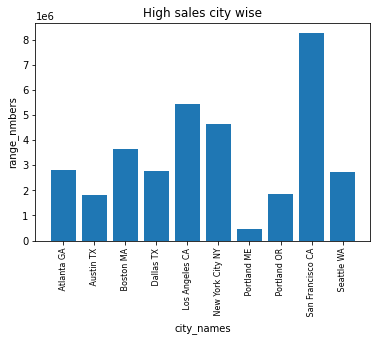

In [246]:
city = [city for city, df in df.groupby('Adress')]
plt.bar(city,results['Sales'])
#to increase the size
plt.xticks(city, rotation ='vertical',size=8)
plt.xlabel('city_names')
plt.ylabel('range_nmbers')
plt.title('High sales city wise')
plt.show()

#### 3. What time shuold we display adds to increase likelyhood of customers buyying product?

In [247]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress
0,0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


###### To do above task we have order date column with timeing as well. so we will use timing to get good timing to buy product.

In [248]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
#or we can below type as well.
#df['Order Date'] = df['Order Date'].astype('datetime64')

In [249]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress,Hours
0,0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX,8
2,2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA,22
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14
5,5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,9


In [250]:
df['Minut'] = df['Order Date'].dt.minute
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress,Hours,Minut
0,0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX,8,46
2,2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA,22,30
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38
5,5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,9,27


In [251]:
df.groupby('Hours').sum()

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Minut
Hours,,,,,,
0,32656621,4428,7.092967e+05,27554,7.137212e+05,103596
1,20049851,2619,4.584900e+05,16657,4.608669e+05,61807
2,10166000,1398,2.338336e+05,8507,2.348514e+05,32508
3,6897634,928,1.447264e+05,5904,1.457579e+05,23044
4,7297221,937,1.620582e+05,6148,1.626610e+05,26876
5,11169140,1493,2.296212e+05,9301,2.306798e+05,42877
6,20865637,2810,4.450001e+05,17539,4.481130e+05,80343
7,33693314,4556,7.405681e+05,28850,7.448541e+05,127447
8,52239036,7002,1.185971e+06,43626,1.192349e+06,198135


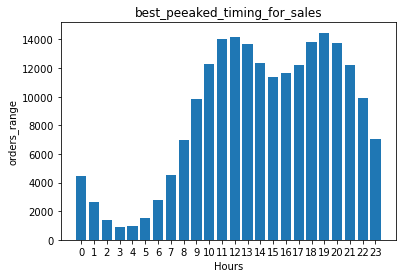

In [252]:
results = df.groupby('Hours').sum()
hours = [hour for hour, df in df.groupby('Hours')]
plt.bar(hours, results['Quantity Ordered'])
plt.xticks(hours, rotation='horizontal',size=10)
plt.xlabel('Hours')
plt.ylabel('orders_range')
plt.title('best_peeaked_timing_for_sales')
plt.show()

###### As we can see above the peek time for add display is 19(7:00 pm) and followed by 12:00 pm is the best time.
Also in aproximation we can say(11:00 am to 1:00 pm)(6:00 to 8:00 pm)

#### 4. What aproducts are most sold together

In [253]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress,Hours,Minut
0,0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX,8,46
2,2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA,22,30
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38
5,5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,9,27


In [254]:
df1 = df[df['Order ID'].duplicated(keep=False)]
df1.head(20)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress,Hours,Minut
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38
18,18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,19,42
19,19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los Angeles CA,19,42
30,30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31
31,31,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31
32,32,176586,AAA Batteries (4-pack),2,2.990000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.980000,San Francisco CA,17,0
33,33,176586,Google Phone,1,600.000000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.000000,San Francisco CA,17,0
119,119,176672,Lightning Charging Cable,1,14.950000,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.950000,New York City NY,11,7
120,120,176672,USB-C Charging Cable,1,11.950000,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.950000,New York City NY,11,7


In [255]:
df1.shape

(14649, 12)

In [256]:
df1['Combined'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\mayyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
df1.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress,Hours,Minut,Combined
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [258]:
df1

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Adress,Hours,Minut,Combined
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,11628,259303,AA Batteries (4-pack),1,3.840000,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.840000,Atlanta GA,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,11639,259314,Wired Headphones,1,11.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.990000,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,11640,259314,AAA Batteries (4-pack),2,2.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.980000,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,11677,259350,Google Phone,1,600.000000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.000000,San Francisco CA,13,49,"Google Phone,USB-C Charging Cable"


In [259]:
df1 = df1[['Order ID','Combined']].drop_duplicates()
df1.shape

(7136, 2)

In [260]:
'''
we can do this type drop as well
df1.drop_duplicates(subset=['Order ID'])
df1.shape
'''

"\nwe can do this type drop as well\ndf1.drop_duplicates(subset=['Order ID'])\ndf1.shape\n"

In [261]:
df1.head(20)

,Order ID,Combined
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [262]:
from itertools import combinations
from collections import Counter

Number = Counter()
for row in df1['Combined']:
    row = row.split(',')
    Number.update(Counter(combinations(row,2)))
Number.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

###### As we can see above top 10 mostly purchased products together. we can get triple products as well. by change the number 2 to 3, 4 we can get our required results.

#### 5.what product sold most? and why do you think it is mostly solded?

In [269]:
most_product =df.groupby('Product').sum()
most_product

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Hours,Minut
Product,,,,,,,
20in Monitor,34263700,4129,4.510690e+05,29336,4.541487e+05,58764,122252
27in 4K Gaming Monitor,52531482,6244,2.429638e+06,44440,2.435098e+06,90916,184331
27in FHD Monitor,62800951,7550,1.125975e+06,52558,1.132424e+06,107540,219948
34in Ultrawide Monitor,51318688,6199,2.348718e+06,43304,2.355558e+06,89076,183480
AA Batteries (4-pack),170984790,27635,7.901568e+04,145558,1.061184e+05,298342,609039
AAA Batteries (4-pack),171339939,31017,6.171659e+04,146370,9.274083e+04,297332,612113
Apple Airpods Headphones,129879472,15661,2.332350e+06,109477,2.349150e+06,223304,455570
Bose SoundSport Headphones,111875345,13457,1.332367e+06,94113,1.345565e+06,192445,392603
Flatscreen TV,39883719,4819,1.440000e+06,34224,1.445700e+06,68815,142789


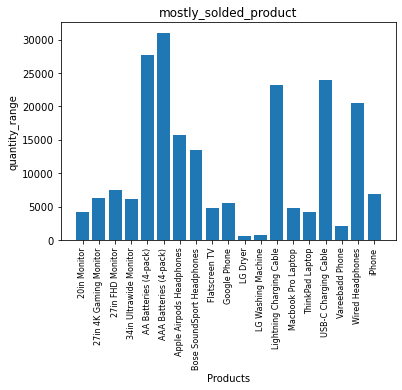

In [268]:
product = [item for item, df in df.groupby('Product')]
plt.bar(product,most_product['Quantity Ordered'])
plt.xticks(product,rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('quantity_range')
plt.title('mostly_solded_product')
plt.show()

###### As we can see above the most solded product is AAA Batteries (4-pack)31017 times solded. and follwoed by AA Batteries (4-pack)27635 times solded.

In [271]:
price = df.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

###### As we can see AAA Batteries (4-pack), AA Batteries (4-pack) are most less price items when campare with others.
so it is mostly effortable price for every people.

As we can see above less price items are high solded products.